In [1]:
### Data Collection
import pandas_datareader as pdr
key=""
import pandas as pd

In [17]:
df=pd.read_csv('main.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,0.595425,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,0.594426,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,0.596424,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,0.592428,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,0.591429,189000.0


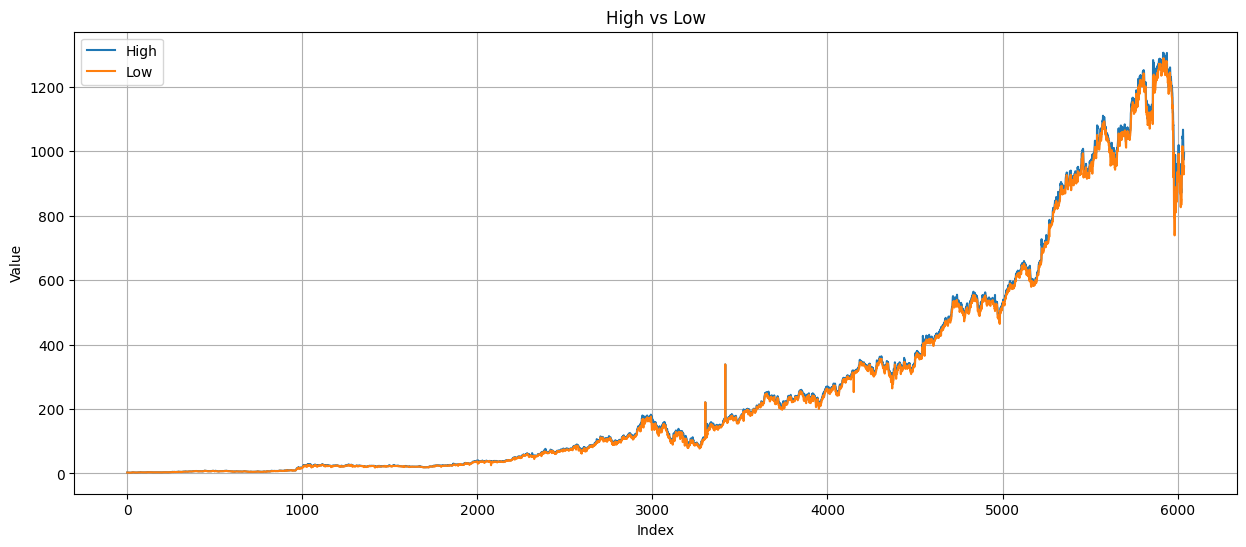

In [10]:


plt.figure(figsize=(15,6))  # Increased width from 10 to 15

# Plotting 'High' column
plt.plot(df['High'], label='High')

# Plotting 'Low' column
plt.plot(df['Low'], label='Low')

plt.title('High vs Low')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


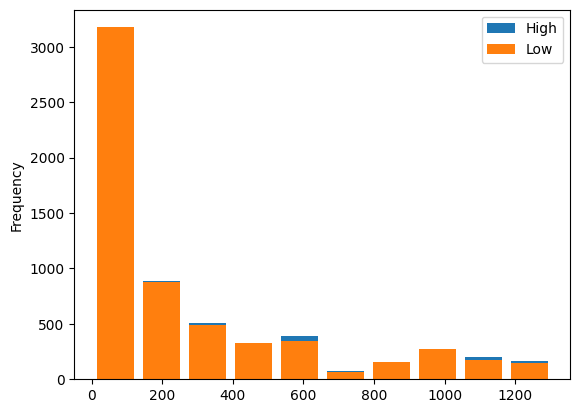

In [26]:
df[['High', 'Low']].plot(kind='hist', rwidth=0.8)
plt.show()

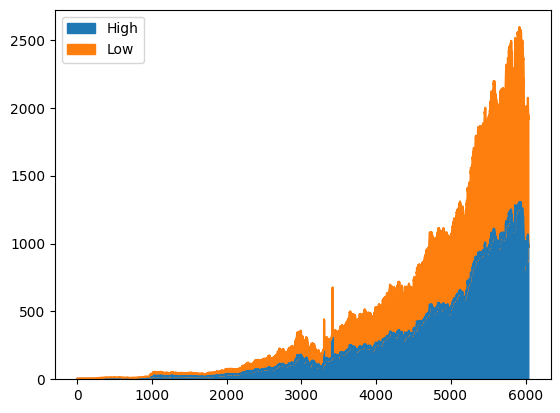

In [28]:
df[['High', 'Low']].plot(kind='area')
plt.show()


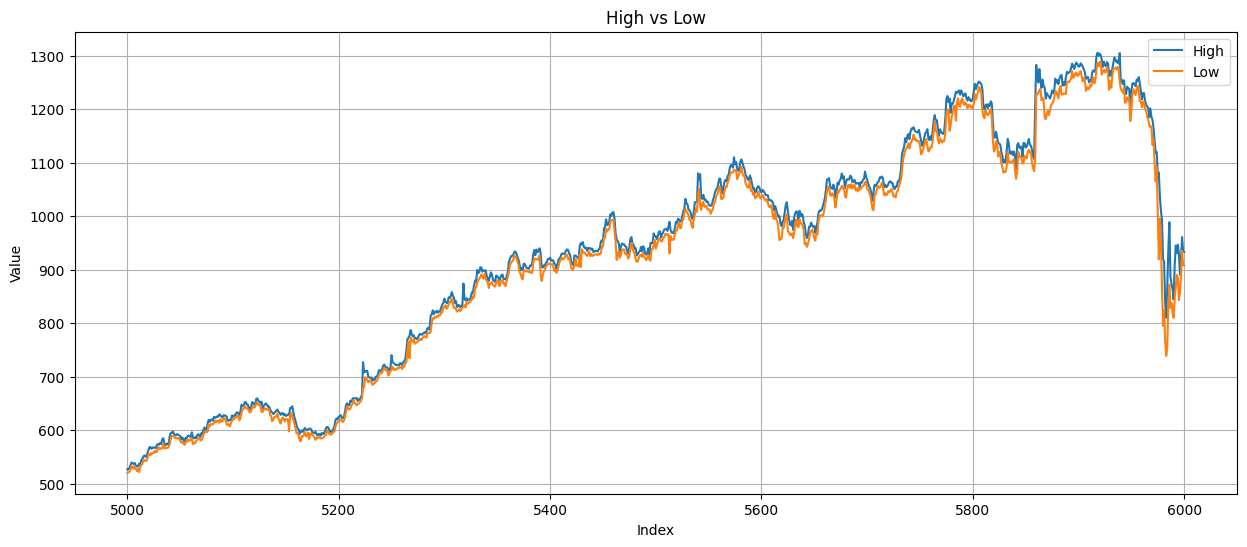

In [11]:
dfz = df.loc[5000:6000]

plt.figure(figsize=(15,6))  # Increased width from 10 to 15

# Plotting 'High' column
plt.plot(dfz['High'], label='High')

# Plotting 'Low' column
plt.plot(dfz['Low'], label='Low')

plt.title('High vs Low')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

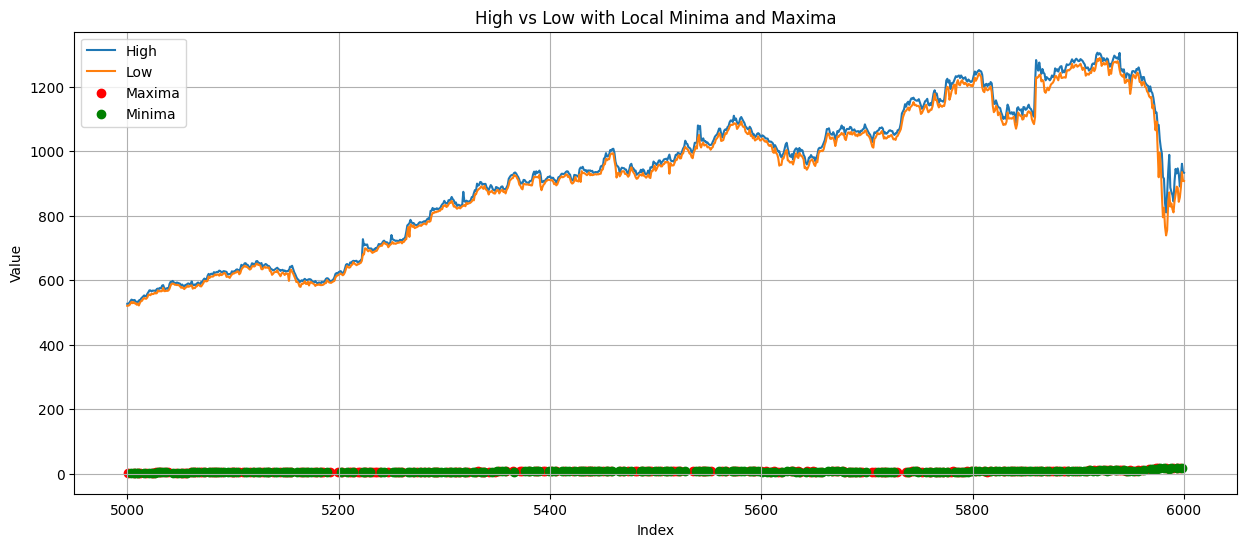

Maxima values:
 5001     526.500000
5006     536.400024
5010     531.674988
5012     535.500000
5018     550.000000
           ...     
5975    1080.000000
5983     810.000000
5990     844.000000
5993     930.900024
5996     890.700012
Name: High, Length: 245, dtype: float64

Minima values:
 5004    532.525024
5006    532.000000
5008    528.375000
5010    527.125000
5016    544.500000
           ...    
5981    824.549988
5986    872.099976
5988    838.000000
5993    890.000000
5998    935.000000
Name: Low, Length: 241, dtype: float64


In [13]:
from scipy.signal import argrelextrema
import numpy as np
# Selecting data between indices 5000 and 6000
dfz = df.loc[5000:6000]

# Define comparator for argrelextrema
comparator = np.less

# Find indices of relative maxima
maxima_indices = argrelextrema(dfz['High'].values, comparator)

# Find indices of relative minima
minima_indices = argrelextrema(dfz['Low'].values, np.greater)

plt.figure(figsize=(15,6))

# Plotting 'High' column
plt.plot(dfz['High'], label='High')

# Plotting 'Low' column
plt.plot(dfz['Low'], label='Low')

# Plotting maxima
plt.scatter(dfz.iloc[maxima_indices].index, df.iloc[maxima_indices]['High'], color='r')

# Plotting minima
plt.scatter(dfz.iloc[minima_indices].index, df.iloc[minima_indices]['Low'], color='g')

plt.title('High vs Low with Local Minima and Maxima')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['High', 'Low', 'Maxima', 'Minima'])
plt.grid(True)
plt.show()

# Print maxima and minima values
print("Maxima values:\n", dfz.iloc[maxima_indices]['High'])
print("\nMinima values:\n", dfz.iloc[minima_indices]['Low'])


LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:

dfz = df.loc[5000:6000]

# Define comparator for argrelextrema
comparator = np.less

# Find indices of relative maxima
maxima_indices = argrelextrema(dfz['High'].values, comparator)

# Find indices of relative minima
minima_indices = argrelextrema(dfz['Low'].values, np.greater)

# Calculate average of local maxima and minima
avg_maxima = dfz.iloc[maxima_indices]['High'].mean()
avg_minima = dfz.iloc[minima_indices]['Low'].mean()

print("Average of local maxima: ", avg_maxima)
print("Average of local minima: ", avg_minima)


Average of local maxima:  925.4671008040815
Average of local minima:  927.0234653609958


##So, Finally by training model and finding maxima and minima when the growth increase or decrease we can send notification to user

In [16]:
# Calculate global maxima and minima
global_maxima = dfz['High'].max()
global_minima = dfz['Low'].min()

print("Global maximum: ", global_maxima)
print("Global minimum: ", global_minima)


Global maximum:  1305.5
Global minimum:  520.275024


In [19]:
# Assuming 'High' and 'Low' are the columns with the data
for index, row in dfz.iterrows():
    if row['High'] == global_maxima:
        print("The global maximum value has been reached: ", global_maxima)
    if row['Low'] == global_minima:
        print("The global minimum value has been reached: ", global_minima)


The global minimum value has been reached:  520.275024
The global maximum value has been reached:  1305.5


In [20]:
import smtplib

def send_email(user_email, subject, message):
    # Set up the SMTP server
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()

    # Login
    server.login("your-email@gmail.com", "your-password")

    # Create the email
    email_message = f"Subject: {subject}\n\n{message}"

    # Send the email
    server.sendmail("your-email@gmail.com", user_email, email_message)

    # Close the SMTP server
    server.quit()


###Completed the given requiremennts for hackathon, now let's train model with LSTM

In [23]:
df1=df.reset_index()['Close']

In [24]:
df1

0         2.980000
1         2.975000
2         2.985000
3         2.965000
4         2.960000
           ...    
6033    991.849976
6034    968.599976
6035    982.750000
6036    949.849976
6037    990.400024
Name: Close, Length: 6038, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
scaler

MinMaxScaler()

In [31]:
print(df1)

[[4.19242049e-04]
 [4.15395791e-04]
 [4.23088306e-04]
 ...
 [7.54108751e-01]
 [7.28800359e-01]
 [7.59993543e-01]]


In [32]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [33]:
training_size,test_size

(3924, 2114)

In [34]:
train_data

array([[0.00041924],
       [0.0004154 ],
       [0.00042309],
       ...,
       [0.18393957],
       [0.18345878],
       [0.1839011 ]])

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(3823, 100)
(3823,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(2013, 100)
(2013,)


(None, None)

In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [40]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 12s 204ms/step - loss: 2.0646e-05 - val_loss: 0.0034
Epoch 2/100
60/60 [==============================] - 13s 214ms/step - loss: 2.0646e-05 - val_loss: 0.0031
Epoch 3/100
60/60 [==============================] - 14s 234ms/step - loss: 1.9216e-05 - val_loss: 0.0046
Epoch 4/100
60/60 [==============================] - 13s 216ms/step - loss: 2.0701e-05 - val_loss: 0.0028
Epoch 5/100
60/60 [==============================] - 13s 213ms/step - loss: 1.8285e-05 - val_loss: 0.0019
Epoch 6/100
60/60 [==============================] - 13s 218ms/step - loss: 1.9772e-05 - val_loss: 0.0032
Epoch 7/100
60/60 [==============================] - 14s 227ms/step - loss: 1.8784e-05 - val_loss: 0.0023
Epoch 8/100
60/60 [==============================] - 14s 233ms/step - loss: 1.8793e-05 - val_loss: 0.0030
Epoch 9/100
30/60 [==============>...............] - ETA: 4s - loss: 2.3941e-05

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.14.0'

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

63/63 [==============================] - 2s 39ms/step


In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.9078124229976128

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5.593125108573112

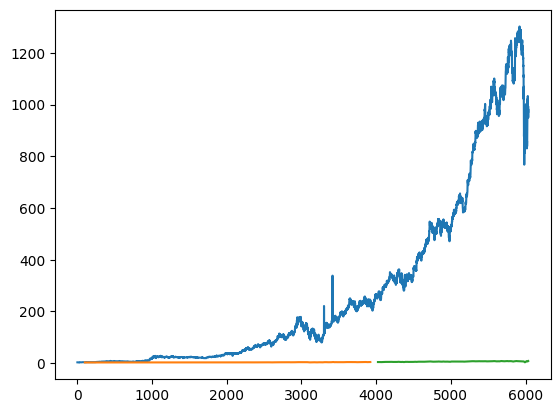

In [50]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

2114

In [52]:
x_input=test_data[1993:].reshape(1,-1)
x_input.shape


(1, 121)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.9922689858461914,
 0.9895381992985065,
 0.9956152104904631,
 1.0,
 0.9898074180801959,
 0.9754223595172664,
 0.9789224913792757,
 0.9844226578206768,
 0.9766916436668682,
 0.9816917781935646,
 0.9879611961006113,
 0.97384545016805,
 0.9527294412807217,
 0.967845251811944,
 0.9653067781306706,
 0.9761532045649868,
 0.9848456899714249,
 0.9873842575013771,
 0.9900766376311366,
 0.9860380674364974,
 0.9886535408817275,
 0.9813456519580944,
 0.9634605553818346,
 0.9553449154952032,
 0.9526525353654437,
 0.955729541228026,
 0.9554988219436893,
 0.9313827131090566,
 0.9390752277655124,
 0.9488062780372157,
 0.9412676698292459,
 0.9414599826956573,
 0.9156900585965302,
 0.9441523628254169,
 0.9555757278589673,
 0.9518448774818727,
 0.9536910056127786,
 0.9522295032146956,
 0.9524602224990323,
 0.9589219532724904,
 0.9530756605956191,
 0.9361136288540636,
 0.9344213125537136,
 0.9314212133756606,
 0.9421522336280949,
 0.934382813056361,
 0.9288826458457085,
 0.9214594445888721,
 0.920651692

In [55]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.9895382  0.99561521 1.         0.98980742 0.97542236 0.97892249
 0.98442266 0.97669164 0.98169178 0.9879612  0.97384545 0.95272944
 0.96784525 0.96530678 0.9761532  0.98484569 0.98738426 0.99007664
 0.98603807 0.98865354 0.98134565 0.96346056 0.95534492 0.95265254
 0.95572954 0.95549882 0.93138271 0.93907523 0.94880628 0.94126767
 0.94145998 0.91569006 0.94415236 0.95557573 0.95184488 0.95369101
 0.9522295  0.95246022 0.95892195 0.95307566 0.93611363 0.93442131
 0.93142121 0.94215223 0.93438281 0.92888265 0.92145944 0.92065169
 0.92080551 0.90403588 0.90553588 0.90722829 0.8818814  0.88380453
 0.87115038 0.84991906 0.85491919 0.78376339 0.82107213 0.76699371
 0.74822396 0.6726835  0.68703001 0.67726051 0.59164283 0.58868123
 0.65718307 0.69129935 0.69387637 0.63787487 0.66114473 0.63633637
 0.62418216 0.68745309 0.68191452 0.70972293 0.68687615 0.66222165
 0.67487585 0.69837647 0.7249541  0.7071075  0.71245377 0.73272357
 0.7197232  0.71329997 0.71460771 0.74976246 0.768

In [56]:
day_new=np.arange(1,121)
day_pred=np.arange(121,151)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

6038

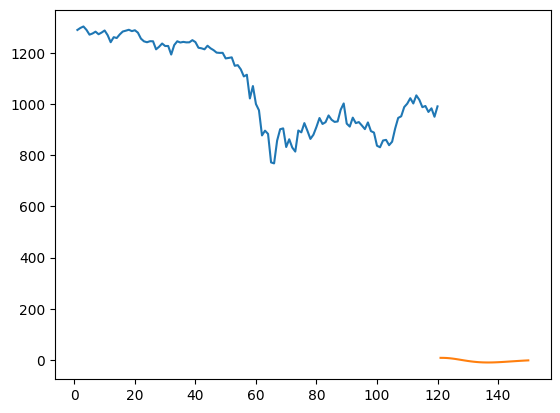

In [59]:
plt.plot(day_new,scaler.inverse_transform(df1[5918:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

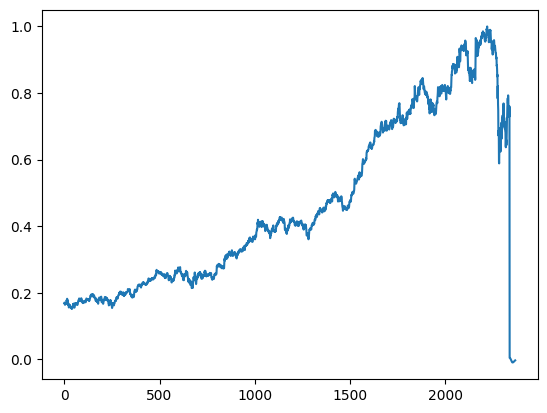

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3700:])


In [62]:
df3=scaler.inverse_transform(df3).tolist()

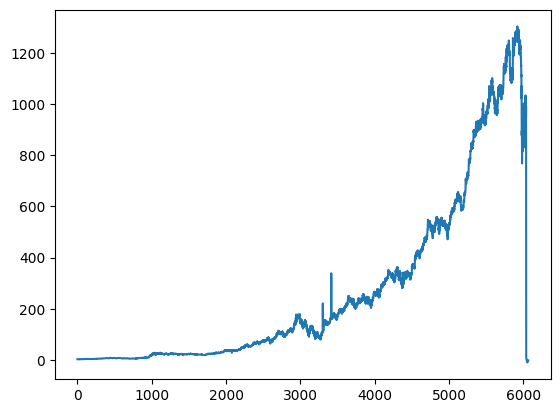

In [63]:
plt.plot(df3)